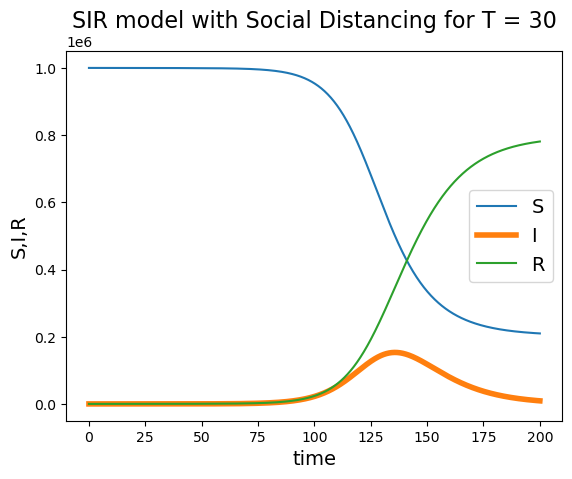

The value of T that flattens the curve the most is: 99


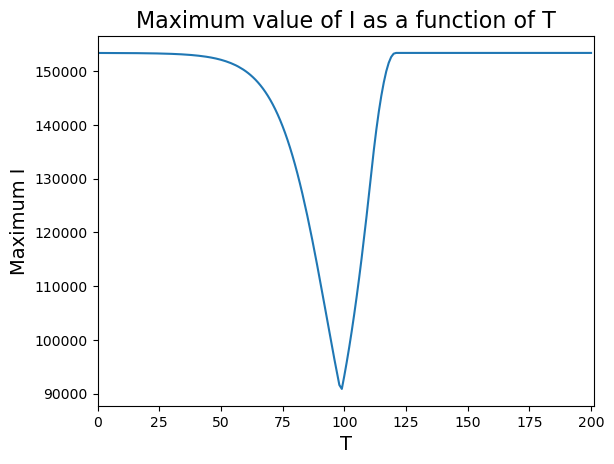

In [9]:
#importing any necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def SIR(y, t, T):
    # returns RHS of the SIR model
    mu = 0.1
    S, I, R = y
    
    def betafunction(t,T): #beta is a function of t and T now
        if t < T: #if t less than T
            return 2*(10**-7) #set this as beta value
        elif T <= t <= T + 30: #if t between T and T + 30
            return 1.5*(10**-7) #set this as beta value
        else: #in any other case
            return 2*(10**-7) #set this as beta value
        
    beta = betafunction(t,T) #define beta so now function doesn't need to be called again    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I

    return Sdot, Idot, Rdot

#sol extraction and plot
def T_is_30_plot(T): #function for the plot of T = 30
        t = np.linspace(0, 200, 1000)
        y0 = [(10**6) - 5, 5, 0] # array of initial conditions
        y_sol = odeint(SIR, y0, t, args=(T,))
        S = y_sol[:,0] # extract S, I, R from the solution array y
        I = y_sol[:,1]
        R = y_sol[:,2]
        N = S + I + R
        
        plt.plot(t, S, label="S")
        plt.plot(t, I, lw=4, label="I")
        plt.plot(t, R, label="R")

        # labels etc
        plt.xlabel("time", fontsize=14)
        plt.ylabel("S,I,R", fontsize=14)
        plt.title("SIR model with Social Distancing for T = 30", fontsize=16)
        plt.legend(fontsize=14)
        plt.show()

T_is_30_plot(30) #calls the function for T = 30

def Imax(T): #returns max I for given T value
    t = np.linspace(0, 200, 1000)
    y0 = [(10**6) - 5, 5, 0] # array of initial conditions
    y_sol = odeint(SIR, y0, t, args=(T,))
    S = y_sol[:,0] # extract S, I, R from the solution array y
    I = y_sol[:,1]
    R = y_sol[:,2]
    N = S + I + R
    max_I = np.max(I) #using numpy function 'max' to call maximum I value for given value of T
    return max_I #purpose of function is to return max I value for given T, so calling function to do this

# Parameters
mu = 0.1
N = 10**6

# Simulation for different values of T
#maxivals removed here
T_values = list(range(1, 201)) #T ranges from 1 to 200, this creates a list of all integers included in this range
max_I_values = [] #create an empty array to append max I for each T to

for T in T_values:
    t = np.linspace(0, 200, 1000)
    y0 = [(10**6) - 5, 5, 0] # array of initial conditions
    y_sol = odeint(SIR, y0, t, args=(T,))
    S = y_sol[:,0] # extract S, I, R from the solution array y
    I = y_sol[:,1]
    R = y_sol[:,2]
    N = S + I + R
    max_I_values = np.append(max_I_values, Imax(T)) #append max I values for each value of T to the array max_I_values
    
# Identify the value of T that minimizes the maximum value of I
min_I_index = np.argmin(max_I_values) #using numpy function 'argmin' to identify the smallest maximal value of I
optimal_T = T_values[min_I_index] #the index with this minimal I value gives the T value which yields this
print('The value of T that flattens the curve the most is:',optimal_T) #printing said T value as required

# Plot maximum value of I as a function of T

plt.plot(T_values, max_I_values)
plt.xlabel("T", fontsize=14)
plt.ylabel("Maximum I", fontsize=14)
plt.xlim(0,201)
plt.title("Maximum value of I as a function of T", fontsize=16)
plt.show()